In [1]:
using Distributions, TimeIt, ProgressMeter, PyPlot, JLD
include("/home/postdoc/dsen/Desktop/codes/G-ZZ_clean/jl_files/zz_samplers.jl")
include("temp.jl")

run_sampler (generic function with 4 methods)

In [2]:
X, y = load("shrinkage_data_2.8.jld", "X", "y")
d, Nobs = size(X)
σ02 = 1
my_pr = SS_prior(d, σ02)
my_ll = ll_logistic_sp(X,y)
my_model = model(my_ll, my_pr)
print("d = ",  d, ", N = ", Nobs)

d = 101, N = 800

### HMC:

### Tune HMC:

In [3]:
ξ0 = randn(d)
Total_time = 10
T = 250
Metropolise = false
Print = false
n_leapfrog_list = 20*(1:5)
prior = SS_prior(d, σ02);

In [4]:
xi_samples_hmc, hyper_samples_hmc, acc = 
zeros(d,T+1,length(n_leapfrog_list)), zeros(hyperparam_size(prior),T+1,length(n_leapfrog_list)), 
zeros(length(n_leapfrog_list));

In [5]:
for (i,n_leapfrog) in enumerate(reverse(n_leapfrog_list))
    start = time()
    prior = SS_prior(d, σ02)
    my_ll = ll_logistic_sp(X,y)
    my_model = model(my_ll, prior)
    stepsize = Total_time/n_leapfrog
    xi_samples_hmc[:,:,i], hyper_samples_hmc[:,:,i], acc[i] = 
    GibbsHMC(my_model, ξ0, stepsize, n_leapfrog, T, Metropolise, Print)
    print("n_leapfrog = ", n_leapfrog, " in ", round((time()-start)/60,2), " mins \n")
end

HMC acceptance = 100.0 percent; n_leapfrog = 100 in 3.91 mins 
HMC acceptance = 100.0 percent; n_leapfrog = 80 in 3.14 mins 
HMC acceptance = 100.0 percent; n_leapfrog = 60 in 2.36 mins 


LoadError: [91mArgumentError: InverseGamma: the condition α > zero(α) && θ > zero(θ) is not satisfied.[39m

In [6]:
Metropolise = true 
Print = false

stepsize = Total_time/50
total_times = 2.0*stepsize*(5:15)
n_leapfrog_steps = 5*(1:10)

for total_time in total_times
    print("Total time = ", round(total_time,2), "\n")
    for n_leapfrog in n_leapfrog_steps
        start = time()
        prior = SS_prior(d, σ02)
        my_ll = ll_logistic_sp(X,y)
        my_model = model(my_ll, prior)
        a, b, c = 
        GibbsHMC(my_model, ξ0, total_time/n_leapfrog, n_leapfrog, 500, Metropolise, Print)
        print("n_leapfrog = ", n_leapfrog, " in ", round((time()-start)/60,2), " mins \n")
    end
end

Total time = 2.0
HMC acceptance = 0.0 percent; n_leapfrog = 5 in 0.47 mins 
HMC acceptance = 0.4 percent; n_leapfrog = 10 in 0.89 mins 
HMC acceptance = 58.2 percent; n_leapfrog = 15 in 1.29 mins 
HMC acceptance = 75.8 percent; n_leapfrog = 20 in 1.72 mins 
HMC acceptance = 87.4 percent; n_leapfrog = 25 in 2.19 mins 
HMC acceptance = 91.6 percent; n_leapfrog = 30 in 2.49 mins 
HMC acceptance = 91.0 percent; n_leapfrog = 35 in 2.83 mins 
HMC acceptance = 94.2 percent; n_leapfrog = 40 in 3.15 mins 
HMC acceptance = 96.4 percent; n_leapfrog = 45 in 3.64 mins 
HMC acceptance = 97.6 percent; n_leapfrog = 50 in 3.98 mins 
Total time = 2.4
HMC acceptance = 0.0 percent; n_leapfrog = 5 in 0.46 mins 
HMC acceptance = 0.0 percent; n_leapfrog = 10 in 0.85 mins 
HMC acceptance = 3.2 percent; n_leapfrog = 15 in 1.23 mins 
HMC acceptance = 62.0 percent; n_leapfrog = 20 in 1.6 mins 
HMC acceptance = 80.0 percent; n_leapfrog = 25 in 2.04 mins 
HMC acceptance = 86.2 percent; n_leapfrog = 30 in 2.5 mins 

In [9]:
total_times_optimal = [2.0, 2.4, 2.8, 3.2, 3.6, 4.0, 4.4, 4.8, 5.2, 5.6, 6.0]
n_leapfrog_optimal =  [16 , 21 , 23 , 27 , 30 , 34 , 36 , 40 , 42 , 45 , 49 ]
T = 5000
Metropolise = true
Print = false

for (i,total_time) in enumerate(total_times_optimal) 
    start = time()
    prior = SS_prior(d, σ02)
    my_ll = ll_logistic_sp(X,y)
    my_model = model(my_ll, prior)
    xi_samples_hmc, hyper_samples_hmc, acc =
    GibbsHMC(my_model, ξ0, total_time/n_leapfrog_optimal[i], n_leapfrog_optimal[i], T, Metropolise, Print)
    print("n_leapfrog = ", n_leapfrog_optimal[i], " in ", round((time()-start)/60,2), " mins \n")
    filename  = "/xtmp/GZZ_data/shrinkage_prior/synthetic_data/GibbsHMC:d:"*string(d)*"-Nobs:"*string(Nobs)*
                "-total_time:"*string(total_time)*"-n_leapfrog:"*string(n_leapfrog_optimal[i])*".jld"
    save(filename, "xi_samples", xi_samples_hmc, "hyper_samples", hyper_samples_hmc, "acc", acc)
    xi_samples_hmc, hyper_samples_hmc, acc = [], [], []
    gc()
end

HMC acceptance = 57.38 percent; n_leapfrog = 16 in 13.34 mins 
HMC acceptance = 74.08 percent; n_leapfrog = 21 in 16.98 mins 
HMC acceptance = 66.28 percent; n_leapfrog = 23 in 18.3 mins 
HMC acceptance = 68.46 percent; n_leapfrog = 27 in 21.34 mins 
HMC acceptance = 67.34 percent; n_leapfrog = 30 in 23.65 mins 
HMC acceptance = 65.4 percent; n_leapfrog = 34 in 26.75 mins 
HMC acceptance = 65.18 percent; n_leapfrog = 36 in 28.24 mins 
HMC acceptance = 64.58 percent; n_leapfrog = 40 in 29.66 mins 
HMC acceptance = 63.24 percent; n_leapfrog = 42 in 31.05 mins 
HMC acceptance = 61.48 percent; n_leapfrog = 45 in 33.19 mins 
HMC acceptance = 65.42 percent; n_leapfrog = 49 in 35.92 mins 


In [3]:
total_times_optimal = [2.0, 2.4, 2.8, 3.2, 3.6, 4.0, 4.4, 4.8, 5.2, 5.6, 6.0]
n_leapfrog_optimal =  [16 , 21 , 23 , 27 , 30 , 34 , 36 , 40 , 42 , 45 , 49 ]
T = 5000

5000

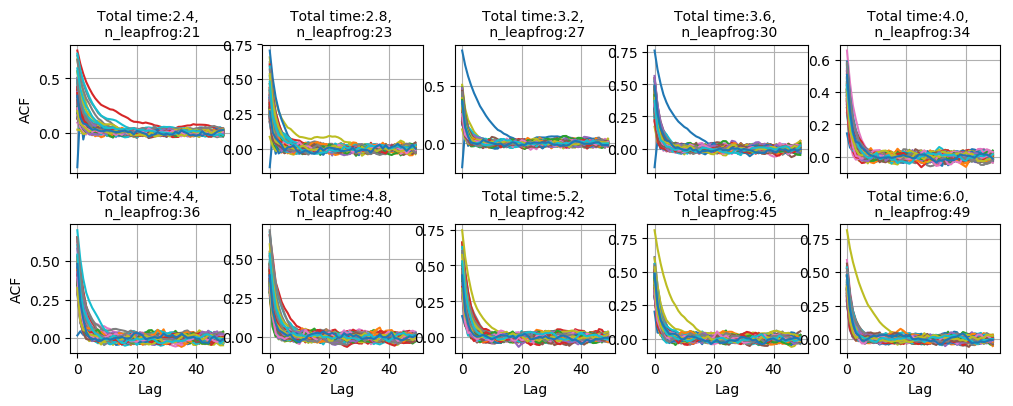

In [4]:
maxlag_hmc = 50
fig = figure(figsize=(12,4))
acfs_hmc = zeros(length(total_times_optimal),d,maxlag_hmc)

for i in 1:2 
    for j in 1:5
        k = 5*(i-1)+j
        total_time, n_leapfrog = total_times_optimal[k+1], n_leapfrog_optimal[k+1]
        filename  = "/xtmp/GZZ_data/shrinkage_prior/synthetic_data/GibbsHMC:d:"*string(d)*"-Nobs:"*string(Nobs)*
                   "-total_time:"*string(total_time)*"-n_leapfrog:"*string(n_leapfrog)*".jld"
        xi_samples_hmc = load(filename, "xi_samples")

        .0
        subplot(2,5,k)
        for dim in 1:size(xi_samples_hmc,1) 
            a = acf(xi_samples_hmc[dim,:], maxlag_hmc)
            plot(a)
            acfs_hmc[k,dim,:] = a
        end
        grid(true)  
        title("Total time:"*string(total_time)*", \n n_leapfrog:"*string(n_leapfrog), fontsize=10)
        xi_samples_hmc = []
        gc()
        if i == 2 xlabel("Lag") end
        if i == 1 xticks(alpha=0) end
        if j == 1 ylabel("ACF") end
        subplots_adjust(hspace=0.4)
    end
end

In [5]:
maxlag_hmc_list = [50, 30, 20, 20, 10, 20, 15, 20, 20, 20]
hmc_mixing = zeros(length(total_times_optimal))
for i in 1:10
    hmc_mixing[i] = T/maximum(sum(acfs_hmc[i,:,1:maxlag_hmc_list[i]],2))
end
hmc_cost = T*n_leapfrog_optimal*Nobs;

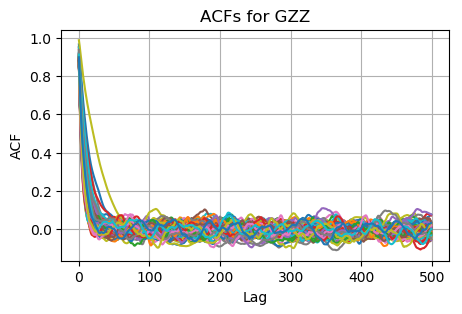

In [6]:
mb_size = 1
max_attempts = 10^7
lambda = 2e1

fig = figure("pyplot_barplot",figsize=(5,3))
n_samples = 10^4
maxlag_gzz = 500
acfs_gzz = zeros(d,maxlag_gzz)
discard = 0
filename  = "/xtmp/GZZ_data/shrinkage_prior/synthetic_data/lambda:"*string(lambda)*
            "-d:"*string(d)*"-Nobs:"*string(Nobs)*"-mb_size:"*string(mb_size)*".jld"
xt_skel, bt_skel = load(filename, "xt_skeleton", "bt_skeleton")
xi_samples_gzz = extract_samples(xt_skel[:,discard+1:end], 
                             bt_skel[:,discard+1:end], 
                            (bt_skel[end]-bt_skel[discard+1])/n_samples,
                            "linear")[:,1:end-1]
iacts_gzz = zeros(size(xi_samples_gzz,1))
for dim in 1:size(xi_samples_gzz,1)
    a = acf(xi_samples_gzz[dim,:],maxlag_gzz)
    plot(a)
    acfs_gzz[dim,:] = a
end
title("ACFs for GZZ")
xlabel("Lag")
ylabel("ACF")
grid(true)
xt_skel, bt_skel, xi_samples = [], [], []
gc()

In [7]:
gzz_mixing = n_samples/maximum(sum(acfs_gzz[:,1:80],2))
gzz_cost = max_attempts*mb_size;

In [8]:
minimum((gzz_mixing/gzz_cost)./(hmc_mixing./hmc_cost))

1.9435464254944064

In [9]:
(gzz_mixing/gzz_cost)./(hmc_mixing./hmc_cost)

11-element Array{Float64,1}:
   4.01924
   2.75665
   3.93063
   4.19533
   1.94355
   3.30415
   3.33029
   4.2492 
   6.72314
   7.28237
 Inf      